In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

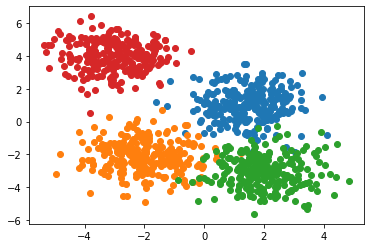

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import numpy as np 

rng = np.random.default_rng()

n = 256
a = rng.multivariate_normal(mean=[1.5, 1], cov=[[1, 0], [0, 1]], size=n).T
b = rng.multivariate_normal(mean=[-2, -2], cov=[[1, 0], [0, 1]], size=n).T
c = rng.multivariate_normal(mean=[2, -3], cov=[[1, 0], [0, 1]], size=n).T
d = rng.multivariate_normal(mean=[-3, 4], cov=[[1, 0], [0, 1]], size=n).T

plt.plot(a[0], a[1], 'o')
plt.plot(b[0], b[1], 'o')
plt.plot(c[0], c[1], 'o')
plt.plot(d[0], d[1], 'o')

t = torch.tensor(np.stack((a, b, c, d)), dtype=torch.float)

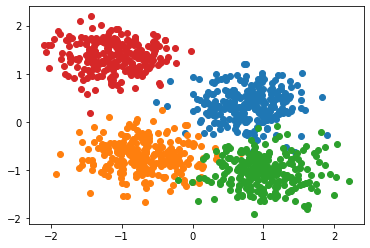

In [55]:
bn = nn.BatchNorm1d(2)

for _ in range(50):
    bn(t)

for x in bn(t):
    x = x.detach()
    plt.plot(x[0], x[1], 'o')

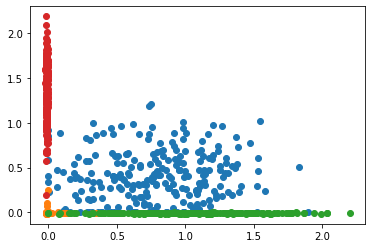

In [56]:
for x in F.leaky_relu(bn(t)):
    x = x.detach()
    plt.plot(x[0], x[1], 'o') 

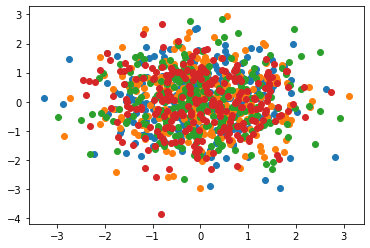

In [57]:
IN = nn.InstanceNorm1d(2)
for x in IN(t):
    x = x.detach()
    plt.plot(x[0], x[1], 'o')

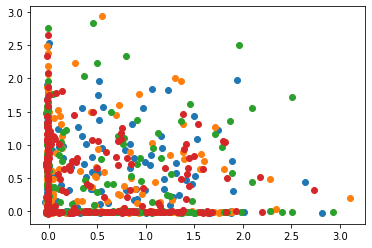

In [58]:
for x in F.leaky_relu(IN(t)):
    x = x.detach()
    plt.plot(x[0], x[1], 'o')

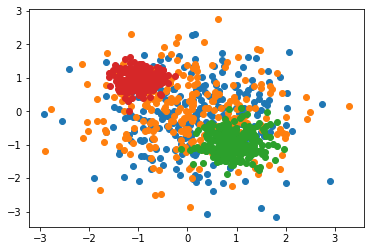

In [59]:
LN = nn.LayerNorm(t.size()[1:])
for x in LN(t):
    x = x.detach()
    plt.plot(x[0], x[1], 'o')

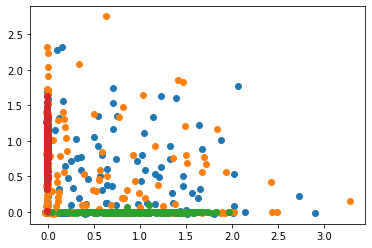

In [60]:
for x in F.leaky_relu(LN(t)):
    x = x.detach()
    plt.plot(x[0], x[1], 'o')

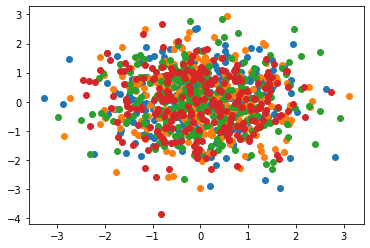

In [61]:
GN = nn.GroupNorm(2, 2)
for x in GN(t):
    x = x.detach()
    plt.plot(x[0], x[1], 'o')

In [1]:
import yaml
from lightning_module import EncoderDecoder
with open('./configs/structured.yaml', 'r') as f:
    cfg = yaml.load(f, Loader=yaml.Loader)

model = EncoderDecoder(cfg)

{'model': {'encoder': {'method': 'structured',
   'model': 'NaiveEnc',
   'kwargs': {'geo_dim': 2, 'param_dim': 2, 'laten_dim': 32}},
  'decoder': {'method': 'structured',
   'model': 'CNNDecoder',
   'kwargs': {'in_channels': 32, 'out_channels': 3}}},
 'data': {'dir': 'data/official/npy'},
 'training': {'loss': ['mse']}}

EncoderDecoder(
  (encoder): NaiveEnc(
    (encoder_geo): CNNEncoder(
      (conv): Sequential(
        (0): Conv2d(2, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=replicate)
        (1): PReLU(num_parameters=1)
      )
      (downsample): Sequential(
        (0): Downsample(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): PReLU(num_parameters=1)
        )
        (1): Downsample(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): PReLU(num_parameters=1)
        )
        (2): Downsample(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): PReLU(num_parameters=1)
        )
      )
      (output): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (encoder_param): MLPEncoder(
      (input): Linear(in_features=2, out_features=32, bias=True)
      (hidden): Se